# Деревья решений

## **Как строится дерево решений**

Дерево решений — это иерархическая модель, которая делит данные на подмножества на основе условий в узлах (состоящих из признаков и пороговых значений). В каждом узле принимается решение о том, как разделить данные, чтобы максимизировать различие между классами или минимизировать разброс в случае регрессии.

Процесс построения дерева решений:

1. **Выбор признака для разделения**:
   - На каждом шаге выбирается признак, по которому лучше всего разделить данные. Этот выбор основан на критерии, который измеряет качество разделения.
   - Для **классификации** обычно используются:
     - **Критерий Джини (Gini impurity)** — мера "нечистоты" узла, которая вычисляется как:

       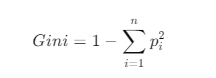\
     
     - **Энтропия** — мера неоднородности:

       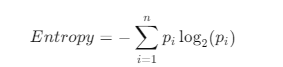\
   - Для **регрессии** может использоваться:
     - **Среднеквадратическая ошибка** или **разброс** (variance).

2. **Разделение данных**:
   - После выбора признака дерево решений выбирает пороговое значение, которое лучше всего разделяет объекты на две группы. Эти группы должны быть максимально однородными по классу (или иметь минимальный разброс для регрессии).
   
3. **Рекурсивное деление**:
   - Процесс повторяется для каждой новой ветви, пока данные не будут разделены настолько, что каждый узел содержит данные, принадлежащие одному классу (или пока не достигнут максимальной глубины дерева).
   
4. **Остановка**:
   - Деление продолжается до тех пор, пока не достигнут один из критериев остановки:
     - Все объекты в узле принадлежат одному классу.
     - Достигнута максимальная глубина дерева.
     - Количество объектов в узле меньше определённого порога (например, меньше минимального количества объектов для разделения).

Пример работы дерева:
На каждом этапе дерево решений выбирает признак и пороговое значение, которые позволяют получить наилучшее разделение данных. Затем дерево рекурсивно строится, пока не достигнет условий остановки.

---


## Что такое жадный способ построения дерева

**Жадный способ построения дерева** — это метод, при котором дерево решений строится, выбирая на каждом шаге **наилучшее разбиение** данных по критерию, который минимизирует ошибку на текущем этапе. Этот процесс повторяется для каждого узла дерева до тех пор, пока не будут выполнены условия остановки (например, дерево достигло максимальной глубины или разбиение не улучшает качество модели).

 Как работает жадный алгоритм:

1. **Выбор признака для разбиения**:
   - Для каждого признака (feature) вычисляется критерий качества разбиения, например, снижение **энтропии**, **GINI** или **дисперсии** в зависимости от типа задачи (классификация или регрессия).
   - Из всех возможных разбиений выбирается то, которое даёт наибольшее улучшение метрики (например, максимальное снижение ошибки).

2. **Рекурсивное построение**:
   - После того как было выбрано наилучшее разбиение, данные делятся на две части (для бинарного дерева), и процесс повторяется отдельно для каждой части (поддерева).
   - В каждом узле выбирается новый лучший признак и лучшее разбиение по этому признаку, исходя из подмножества данных, попавшего в этот узел.

3. **Остановка**:
   - Процесс продолжается до тех пор, пока не будет выполнено одно из условий остановки:
     - Дерево достигло максимальной глубины.
     - В узле осталось слишком мало данных для дальнейшего разбиения.
     - Все данные в узле принадлежат к одному классу или почти одинаковы по значению (для регрессии).

Жадный алгоритм строит дерево шаг за шагом, **не оглядываясь на глобальную оптимизацию** всей структуры дерева, а вместо этого на каждом этапе выбирает локально лучшее разбиение, стремясь минимизировать текущую ошибку.

 Примеры критериев для выбора лучшего разбиения:

1. **Для задач классификации**:
   - **Информационная выгода (Information Gain)**: измеряет уменьшение энтропии после разбиения.
   - **Индекс Джини (Gini Index)**: измеряет чистоту подмножеств после разбиения.
   
2. **Для задач регрессии**:
   - **Снижение дисперсии**: выбирается разбиение, которое минимизирует дисперсию в поддеревьях.
   - **Среднеквадратичная ошибка (MSE)**: вычисляется уменьшение ошибки предсказания после разбиения.

 Пример:

Рассмотрим задачу классификации, где нужно разделить данные на классы "0" и "1". У нас есть несколько признаков. Жадный алгоритм на каждом этапе выбирает такой признак и его пороговое значение, которые наилучшим образом разделяют данные на подмножества, где классы "0" и "1" более "чистые" (в подмножестве как можно больше элементов одного класса). Этот процесс продолжается рекурсивно для каждого нового подмножества.

Преимущества жадного подхода:
- **Простота и скорость**: Жадный алгоритм легко реализуется и быстро находит локальные оптимальные разбиения для построения дерева.
- **Локальная оптимальность**: На каждом шаге выбор разбиений делается на основе лучших возможных улучшений текущей ошибки.

 Недостатки жадного подхода:
- **Отсутствие глобальной оптимизации**: Жадный алгоритм выбирает локально лучшее разбиение, но это не гарантирует глобальной оптимальности всей структуры дерева. Иногда другие разбиения могли бы в конечном итоге привести к лучшему результату, но они не рассматриваются.
- **Переобучение**: Жадное построение может привести к созданию очень глубоких деревьев с большим количеством узлов, что может вызвать переобучение на обучающем наборе данных. Для борьбы с этим часто применяются методы регуляризации, такие как ограничение глубины дерева или минимальный размер узлов.

 Заключение:
Жадный способ построения деревьев — это эффективный, но локально оптимальный подход, который последовательно выбирает наилучшие разбиения на каждом шаге. Этот метод лежит в основе многих алгоритмов построения деревьев решений, включая модели градиентного бустинга и случайных лесов.

# Градиентный бустинг

## Catboost, LightGBM, XGBoost
CatBoost, LightGBM и XGBoost — три популярные реализации градиентного бустинга, которые используют схожие принципы, но различаются в оптимизациях, производительности и особенностях работы. Рассмотрим подробнее ключевые различия между ними.
**XGBoost (Extreme Gradient Boosting)**

XGBoost — одна из самых ранних и популярных реализаций градиентного бустинга. Она добавила несколько важных улучшений к традиционному градиентному бустингу, что сделало её очень популярной в задачах соревнований по машинному обучению и в промышленном использовании.

 Особенности XGBoost:

- **Использование регуляризации**: XGBoost включает \( L1 \)- и \( L2 \)-регуляризацию для предотвращения переобучения. Это делает модель более устойчивой к шуму в данных.
- **Поддержка параллельных вычислений**: XGBoost может распараллеливать построение деревьев, ускоряя обучение.
- **Оптимизация поиска разбиений**: XGBoost использует метод предварительной сортировки признаков, что позволяет быстрее находить оптимальные разбиения для узлов деревьев.
- **Использование бустинга с использованием вторых производных**: XGBoost работает с функцией потерь не только через градиент (первую производную), но и через гессовую матрицу (вторую производную), что ускоряет сходимость.
- **Обработка пропусков в данных**: XGBoost автоматически обрабатывает пропуски в данных, предполагая оптимальное направление для пропущенных значений при разбиениях узлов.
- **Деревья с фиксированным шагом**: Каждое дерево корректирует предсказания модели с фиксированной скоростью обучения, чтобы избежать слишком резкого изменения модели.

Основной алгоритм:
XGBoost на каждом шаге минимизирует квадратичную ошибку за счёт градиентов и гессовой матрицы для корректировки весов. Благодаря регуляризации и эффективной обработке данных, он является мощным инструментом для табличных данных.

---

2. **LightGBM (Light Gradient Boosting Machine)**

LightGBM разработан Microsoft и создан для улучшения масштабируемости и скорости обучения на больших наборах данных. Он часто используется в производственных приложениях, где важны высокая скорость и низкое потребление памяти.

 Особенности LightGBM:

- **Гистограммный метод (Histogram-based approach)**: Вместо поиска точек разбиений на непрерывных признаках, LightGBM сначала бинирует данные (создаёт гистограммы), что значительно ускоряет процесс обучения. Это особенно эффективно на больших наборах данных.
- **Метод бустинга по листьям (Leaf-wise growth)**: LightGBM строит деревья, выбирая узлы, которые максимизируют прирост информации (наиболее информативные разбиения) и углубляя только наиболее полезные ветви дерева. Это позволяет более гибко адаптировать модель, но также может привести к переобучению на небольших данных.
- **Поддержка больших данных**: LightGBM разработан для работы с очень большими наборами данных и хорошо масштабируется.
- **Улучшенная поддержка категориальных признаков**: LightGBM умеет эффективно работать с категориальными признаками, бинируя их и выполняя разбиения на основе статистики.
- **Параллелизм**: LightGBM поддерживает распределённые вычисления и параллельное построение деревьев, что ускоряет обучение.

 Основной алгоритм:
LightGBM фокусируется на эффективности за счёт использования гистограммного метода и бустинга по листьям. Этот подход помогает работать быстрее и эффективнее на больших наборах данных.

---

 3. **CatBoost (Categorical Boosting)**

CatBoost был разработан компанией Яндекс и специально оптимизирован для работы с категориальными признаками, что делает его очень полезным для задач с табличными данными, где категориальные признаки играют важную роль. Это отличает его от других реализаций, которые требуют предварительного кодирования категорий в числовые значения.

 Особенности CatBoost:

- **Автоматическая обработка категориальных признаков**: CatBoost автоматически и эффективно кодирует категориальные признаки, используя метод **сглаживания целевых значений** (target encoding) и динамическое кодирование, чтобы предотвратить утечки информации (overfitting). Это позволяет избежать необходимости в one-hot encoding или label encoding.
- **Без градиентного смещения (Gradient Bias-Free)**: В классическом градиентном бустинге могут возникать смещения градиентов на первых шагах обучения, особенно при маленьком размере данных. CatBoost решает эту проблему с помощью особой процедуры вычисления градиентов, что улучшает сходимость.
- **Обучение с перемешиванием (Ordered boosting)**: CatBoost использует уникальный метод, который строит модели на основе порядковых разбиений (Ordered Target Statistics), предотвращая утечки информации при обучении на категориальных признаках.
- **Высокая производительность и распараллеливание**: CatBoost также поддерживает параллельное обучение и хорошо масштабируется на больших данных.
- **Стабильность на малых данных**: Благодаря особенностям работы с категориальными признаками и ordered boosting, CatBoost менее подвержен переобучению на небольших выборках по сравнению с XGBoost и LightGBM.

 Основной алгоритм:
CatBoost работает с градиентным бустингом, как и другие реализации, но его отличительной чертой является оптимизация для категориальных признаков и предотвращение смещения градиентов. Его метод Ordered Boosting помогает предотвратить утечку информации.

---

Ключевые различия между XGBoost, LightGBM и CatBoost:

| Характеристика                      | **XGBoost**                                      | **LightGBM**                                  | **CatBoost**                                       |
|--------------------------------------|-------------------------------------------------|----------------------------------------------|--------------------------------------------------|
| **Обработка категориальных признаков** | Требуется предварительное кодирование            | Требуется предварительное кодирование        | Автоматическое и эффективное кодирование          |
| **Метод построения деревьев**        | Строит деревья с фиксированной глубиной          | Бустинг по листьям (leaf-wise growth)         | Бустинг по разбиениям (ordered boosting)          |
| **Скорость обучения**                | Быстрее, чем традиционный бустинг, но медленнее, чем LightGBM | Очень быстрая за счёт гистограммного метода  | Высокая, но медленнее LightGBM                    |
| **Регуляризация**                    | \(L1\) и \(L2\)-регуляризация                    | \(L1\) и \(L2\)-регуляризация                | Регуляризация через ordered boosting               |
| **Поддержка больших данных**         | Поддерживает большие данные, но требует много памяти | Поддержка больших данных, оптимизация памяти | Хорошая производительность на средних и малых данных |
| **Устойчивость к переобучению**      | Зависит от гиперпараметров                       | Может переобучаться из-за leaf-wise роста    | Устойчив к переобучению за счёт работы с категориями |

 Когда использовать каждую библиотеку:

- **XGBoost**: Подходит для задач с табличными данными, где важно высокое качество предсказаний. Он хорошо справляется с задачами регрессии и классификации, особенно если данные уже обработаны (например, категориальные признаки закодированы).

- **LightGBM**: Идеален для задач с большими данными и ограничениями по времени или памяти. Он быстрее, чем XGBoost, благодаря гистограммному методу и эффективной работе с большими объёмами данных.

- **CatBoost**: Отличный выбор для задач с большим количеством категориальных признаков, где важно автоматическое их кодирование и защита от переобучения. Он также хорошо работает на малых и средних данных, обеспечивая высокую точность.

Таким образом, выбор между этими библиотеками зависит от ваших данных (особенно наличия категориальных признаков), требований к скорости и точности, а также ограничений по ресурсам.

---

# Bias-variance decomposition


**Bias-Variance Decomposition** (разложение смещения и разброса) — это важная концепция в машинном обучении, которая помогает понять ошибки моделей и причины, по которым они могут быть недообученными (underfitting) или переобученными (overfitting).

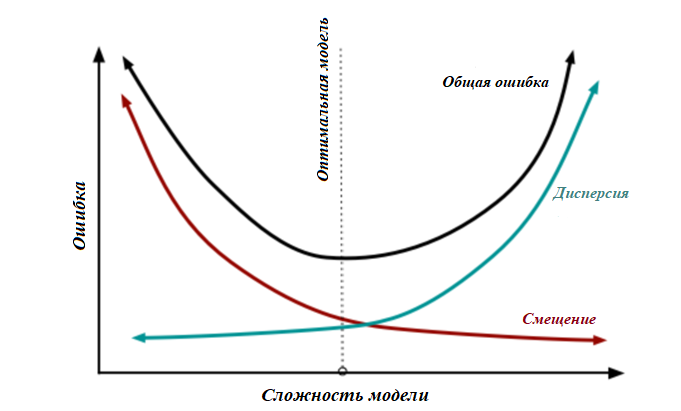

 Основные составляющие:

1. **Bias (смещение)**: Это ошибка, возникающая из-за слишком сильных упрощений, которые модель делает о данных.
   - **Высокое смещение** означает, что модель делает грубые предположения и не улавливает сложные закономерности в данных.
   - **Низкое смещение** означает, что модель хорошо аппроксимирует истинные зависимости в данных.

2. **Variance (разброс)**: Это мера чувствительности модели к малым изменениям в обучающих данных.
   - **Высокий разброс** означает, что модель очень подстраивается под конкретные данные, запоминает их и может плохо обобщать на новые данные.
   - **Низкий разброс** означает, что модель не слишком чувствительна к малым изменениям в обучающих данных и обобщает хорошо.

3. **Irreducible error (неискоренимая ошибка)**: Это ошибка, связанная с шумом в данных. Она неизбежна и не может быть устранена с помощью моделей.

 Формула общей ошибки модели:
Общая ошибка модели на новых данных, которую мы стремимся минимизировать, состоит из трёх компонентов:

\[
\text{Total Error} = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}
\]

- **Bias** описывает то, насколько модель в среднем отклоняется от истинных значений (ошибка из-за слишком сильного упрощения).
- **Variance** описывает, насколько сильно модель отклоняется на различных подвыборках данных (ошибка из-за переобучения).

 Баланс между смещением и разбросом:
- **Модель с высоким смещением и низким разбросом** обычно недообучена. Она делает слишком простые предположения о данных и не улавливает их сложные закономерности. Пример — линейные модели на сложных нелинейных данных.
  
- **Модель с низким смещением и высоким разбросом** обычно переобучена. Она слишком сильно подстраивается под обучающие данные, включая шум, и плохо работает на новых данных. Пример — слишком сложные модели, такие как глубокие нейронные сети с недостаточным объемом данных.

 Пример:

Представьте, что вам нужно построить модель для предсказания цены дома. Если вы выберете слишком простую модель (например, линейную регрессию), она будет иметь **высокое смещение** и не сможет уловить более сложные зависимости (например, нелинейные эффекты расположения дома). Если вы выберете слишком сложную модель (например, глубокую нейронную сеть) и обучите её на небольшом объеме данных, она может **переобучиться**, то есть иметь **высокий разброс**, подстроившись под шум и особенности конкретного набора данных.

 Проблема:
- **Underfitting (недообучение)** — высокая ошибка из-за **высокого смещения**. Модель слишком упрощена и не отражает зависимости в данных.
- **Overfitting (переобучение)** — высокая ошибка из-за **высокого разброса**. Модель слишком детально повторяет данные, включая шум, и не обобщает информацию.

 Как находить баланс?
Главная цель в машинном обучении — найти баланс между смещением и разбросом. Это делается за счёт:
- Выбора правильной модели (не слишком сложной и не слишком простой).
- Регуляризации (например, L1, L2), чтобы снизить разброс, не увеличивая смещение.
- Использования методов кросс-валидации для нахождения оптимальных гиперпараметров.

Баланс между смещением и разбросом очень важен для создания моделей, которые могут хорошо обобщать информацию на новых данных.